<p style="margin-top: 3em; margin-bottom: 3em;"><font size="7"><b>Matplotlib & Seaborn: Introduction </b></font></p>

In [1]:
%matplotlib inline

# Matplotlib

[Matplotlib](http://matplotlib.org/) is a Python package used widely throughout the scientific Python community to produce high quality 2D publication graphics. It transparently supports a wide range of output formats including PNG (and other raster formats), PostScript/EPS, PDF and SVG and has interfaces for all of the major desktop GUI (graphical user interface) toolkits. It is a great package with lots of options.

However, matplotlib is...

> The 800-pound gorilla — and like most 800-pound gorillas, this one should probably be avoided unless you genuinely need its power, e.g., to make a **custom plot** or produce a **publication-ready** graphic.

> (As we’ll see, when it comes to statistical visualization, the preferred tack might be: “do as much as you easily can in your convenience layer of choice [nvdr e.g. directly from Pandas, or with seaborn], and then use matplotlib for the rest.”)

(quote used from [this](https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/) blogpost)

And that's we mostly did, just use the `.plot` function of Pandas. So, why do we learn matplotlib? Well, for the *...then use matplotlib for the rest.*; at some point, somehow!

Matplotlib comes with a convenience sub-package called ``pyplot`` which, for consistency with the wider matplotlib community, should always be imported as ``plt``:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## - dry stuff - The matplotlib `Figure`, `axes` and `axis`

At the heart of **every** plot is the figure object. The "Figure" object is the top level concept which can be drawn to one of the many output formats, or simply just to screen. Any object which can be drawn in this way is known as an "Artist" in matplotlib.

Lets create our first artist using pyplot, and then show it:

In [3]:
fig = plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

On its own, drawing the figure artist is uninteresting and will result in an empty piece of paper (that's why we didn't see anything above).

By far the most useful artist in matplotlib is the "Ax**e**s" artist. The Axes artist represents the "data space" of a typical plot, a rectangular axes (the most common, but not always the case, e.g. polar plots) will have 2 (confusingly named) Ax**i**s artists with tick labels and tick marks.

There is no limit on the number of Axes artists which can exist on a Figure artist. Let's go ahead and create a figure with a single Axes artist, and show it using pyplot:

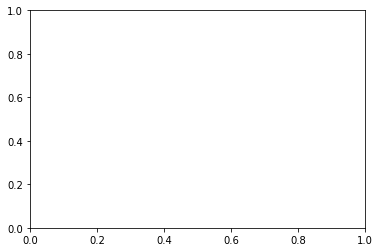

In [4]:
ax = plt.axes()

Matplotlib's ``pyplot`` module makes the process of creating graphics easier by allowing us to skip some of the tedious Artist construction. For example, we did not need to manually create the Figure artist with ``plt.figure`` because it was implicit that we needed a figure when we created the Axes artist.

Under the hood matplotlib still had to create a Figure artist, its just we didn't need to capture it into a variable. We can access the created object with the "state" functions found in pyplot called **``gcf``** and **``gca``**.

## - essential stuff - `pyplot` versus Object based

Some example data:

In [5]:
x = np.linspace(0, 5, 10)
y = x ** 2

Observe the following difference:

**1. pyplot style: plt...** (you will see this a lot for code online!)

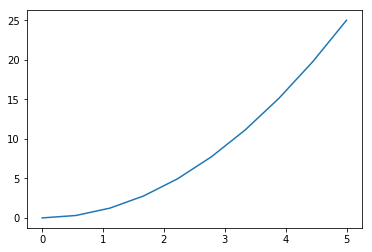

In [6]:
plt.plot(x, y, '-')

**2. creating objects**

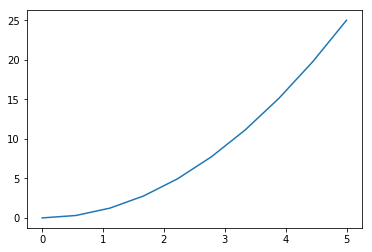

In [7]:
fig, ax = plt.subplots()
ax.plot(x, y, '-')

Although a little bit more code is involved, the advantage is that we now have **full control** of where the plot axes are placed, and we can easily add more than one axis to the figure:

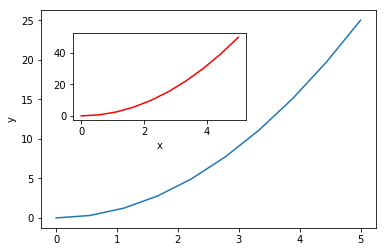

In [8]:
fig, ax1 = plt.subplots()
ax.plot(x, y, '-')
ax2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes
ax1.plot(x, y, '-')
ax1.set_ylabel('y')
ax2.set_xlabel('x')
ax2.plot(x, y*2, 'r-')

<div class="alert alert-info" style="font-size:18px">

<b>REMEMBER</b>:

 <ul>
  <li>Use the **object oriented** power of Matplotlib!</li>
  <li>Get yourself used to writing `fig, ax = plt.subplots()`</li>
</ul>
</div>

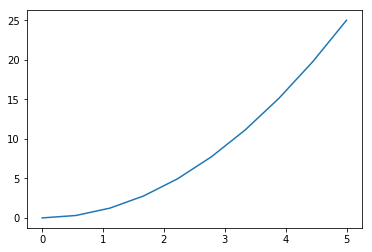

In [9]:
fig, ax = plt.subplots()
ax.plot(x, y, '-')
# ...

## An small cheat-sheet reference for some common elements

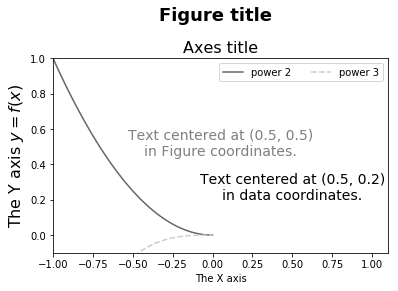

In [10]:
x = np.linspace(-1, 0, 100)

fig, ax  = plt.subplots()

# Adjust the created axes so that its topmost extent is 0.8 of the figure.
fig.subplots_adjust(top=0.8)

ax.plot(x, x**2, color='0.4', label="power 2")
ax.plot(x, x**3, color='0.8',  linestyle='--', label="power 3")

fig.suptitle('Figure title', fontsize=18, 
             fontweight='bold')
ax.set_title('Axes title', fontsize=16)

ax.set_xlabel('The X axis')
ax.set_ylabel('The Y axis $y=f(x)$', fontsize=16)

ax.set_xlim(-1.0, 1.1)
ax.set_ylim(-0.1, 1.)

ax.text(0.5, 0.2, 'Text centered at (0.5, 0.2)\nin data coordinates.',
        horizontalalignment='center', fontsize=14)

ax.text(0.5, 0.5, 'Text centered at (0.5, 0.5)\nin Figure coordinates.',
        horizontalalignment='center', fontsize=14, 
        transform=ax.transAxes, color='grey')

ax.legend(loc='upper right', frameon=True, ncol=2)

For more information on legend positioning, check [this post](http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot) on stackoverflow!

Another nice blogpost about customizing matplotlib figures: http://pbpython.com/effective-matplotlib.html

## I do not like the style...

The power of the object-oriented way of working makes it possible to change everything. However, mostly we just want **quickly a good-looking plot**. Matplotlib provides a number of styles that can be used to quickly change a number of settings:

In [11]:
plt.style.available

['ggplot',
 'seaborn-dark-palette',
 'seaborn-white',
 'seaborn-pastel',
 'seaborn',
 'grayscale',
 'seaborn-paper',
 'seaborn-darkgrid',
 '_classic_test',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'Solarize_Light2',
 'seaborn-poster',
 'seaborn-dark',
 'bmh',
 'seaborn-deep',
 'dark_background',
 'seaborn-muted',
 'seaborn-bright',
 'seaborn-talk',
 'classic',
 'seaborn-colorblind',
 'tableau-colorblind10',
 'seaborn-notebook',
 'fast']

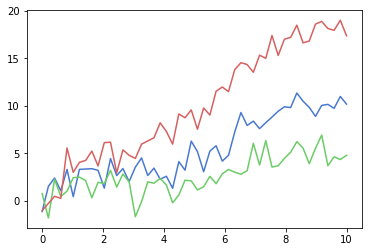

In [12]:
x = np.linspace(0, 10)

with plt.style.context('seaborn-muted'):  # 'ggplot', 'bmh', 'grayscale', 'seaborn-whitegrid'
    fig, ax = plt.subplots()
    ax.plot(x, np.sin(x) + x + np.random.randn(50))
    ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
    ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))

We should not start discussing about colors and styles, just pick **your favorite style**!

## Interaction with Pandas

What we have been doing while plotting with Pandas:

In [13]:
import pandas as pd

In [14]:
aqdata = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'],
                     index_col=0, parse_dates=True)
aqdata = aqdata["2014":].resample('D').mean()

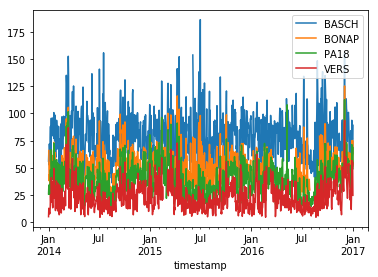

In [15]:
aqdata.plot()

### The pandas versus matplotlib

#### Comparison 1: single plot

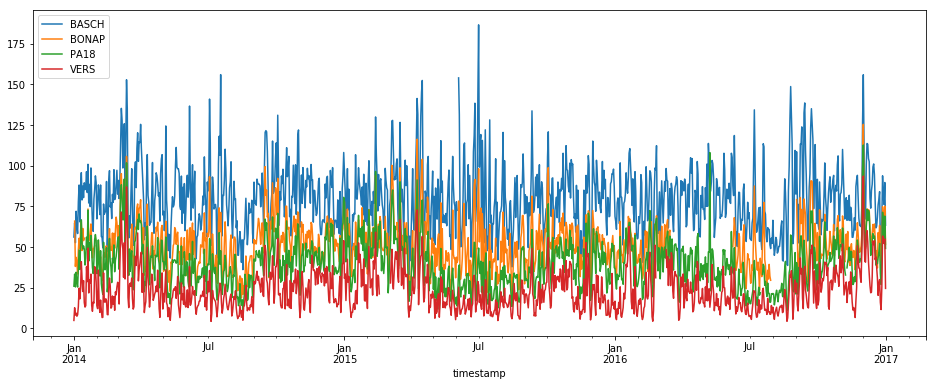

In [16]:
aqdata.plot(figsize=(16, 6)) # shift tab this!

Making this with matplotlib...

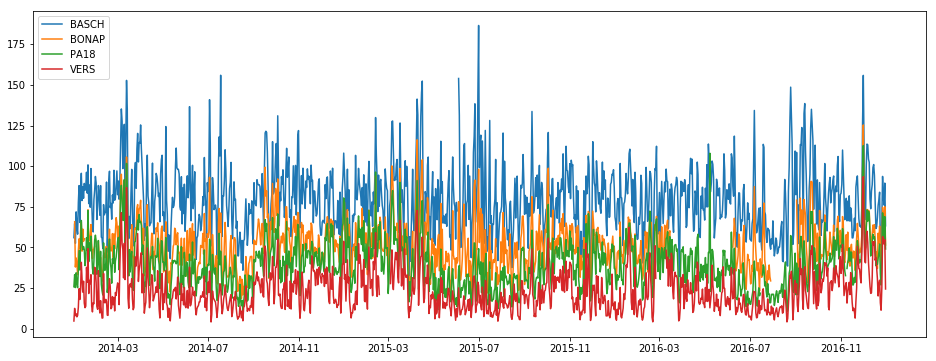

In [17]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(aqdata.index, aqdata["BASCH"],
        aqdata.index, aqdata["BONAP"], 
        aqdata.index, aqdata["PA18"],
        aqdata.index, aqdata["VERS"])
ax.legend(["BASCH", "BONAP", "PA18", "VERS"])

or...

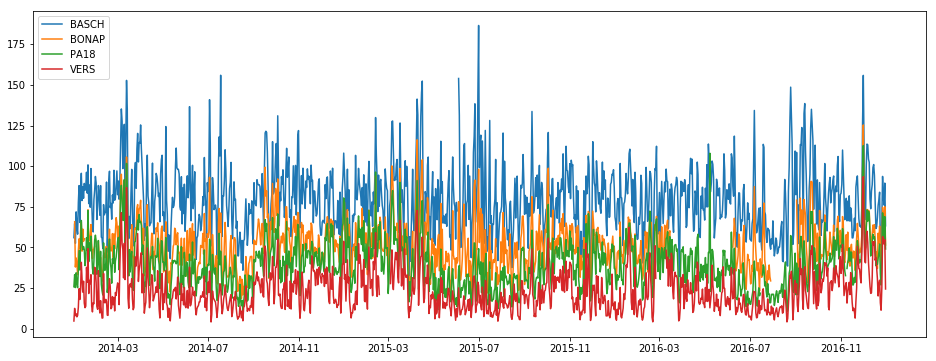

In [18]:
fig, ax = plt.subplots(figsize=(16, 6))
for station in aqdata.columns:
    ax.plot(aqdata.index, aqdata[station], label=station)
ax.legend()

#### Comparison 2: with subplots

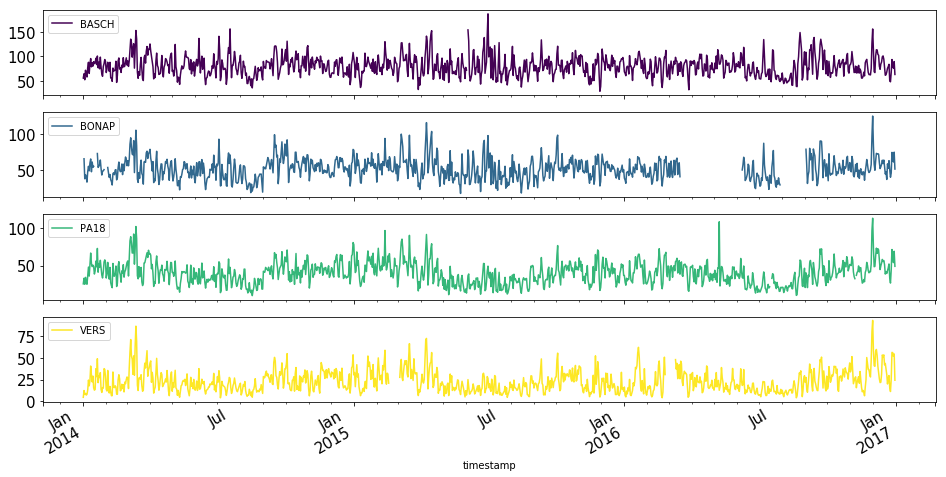

In [19]:
axs = aqdata.plot(subplots=True, sharex=True,
                  figsize=(16, 8), colormap='viridis', # Dark2
                  fontsize=15)

Mimicking this in matplotlib (just as a reference):

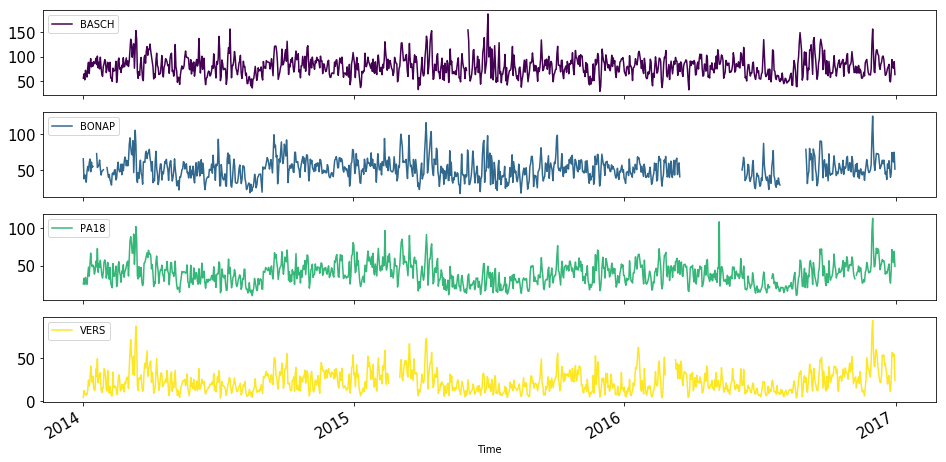

In [20]:
from matplotlib import cm
import matplotlib.dates as mdates

colors = [cm.viridis(x) for x in np.linspace(0.0, 1.0, len(aqdata.columns))] # list comprehension to set up the colors

fig, axs = plt.subplots(4, 1, figsize=(16, 8))

for ax, col, station in zip(axs, colors, aqdata.columns):
    ax.plot(aqdata.index, aqdata[station], label=station, color=col)
    ax.legend()
    if not ax.is_last_row():
        ax.xaxis.set_ticklabels([])
        ax.xaxis.set_major_locator(mdates.YearLocator())
    else:
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.set_xlabel('Time')
    ax.tick_params(labelsize=15)
fig.autofmt_xdate()

### Best of both worlds...

In [21]:
aqdata.columns

Index(['BASCH', 'BONAP', 'PA18', 'VERS'], dtype='object')

Text(0.5,0.98,'Air quality station time series')

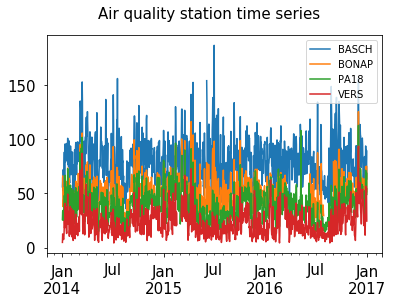

In [22]:
fig, ax = plt.subplots() #prepare a matplotlib figure

aqdata.plot(ax=ax) # use pandas for the plotting

# Provide further adaptations with matplotlib:
ax.set_xlabel("")
ax.tick_params(labelsize=15, pad=8, which='both')
fig.suptitle('Air quality station time series', fontsize=15)

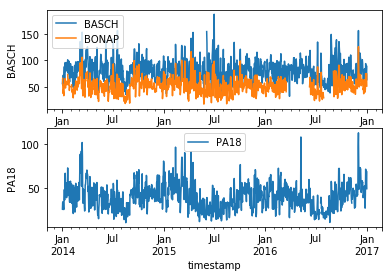

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1) #provide with matplotlib 2 axis

aqdata[["BASCH", "BONAP"]].plot(ax=ax1) # plot the two timeseries of the same location on the first plot
aqdata["PA18"].plot(ax=ax2) # plot the other station on the second plot

# further adapt with matplotlib
ax1.set_ylabel("BASCH")
ax2.set_ylabel("PA18")
ax2.legend()

<div class="alert alert-info">

 <b>Remember</b>: 

 <ul>
  <li>You can do anything with matplotlib, but at a cost... [stackoverflow!!](http://stackoverflow.com/questions/tagged/matplotlib)</li>
  <li>The preformatting of Pandas provides mostly enough flexibility for quick analysis and draft reporting. It is not for paper-proof figures or customization</li>
</ul>
<br>


</div>

<div class="alert alert-danger">

 <b>NOTE</b>: 

If you take the time to make you're perfect/spot-on/greatest-ever matplotlib-figure: Make it a **reusable function**! (see tomorrow!)

<ul>
  <li>Let your hard work pay off, write your own custom functions!</li>
</ul>

</div>

<div class="alert alert-info" style="font-size:18px">

 <b>Remember</b>: 

`fig.savefig()` to save your Figure object!

</div>

# Seaborn

In [24]:
import seaborn as sns

* Built on top of Matplotlib, but providing
    1. High level functions
    2. Much cleaner default figures
* Works well with Pandas

## First example: `pairplot`

A scatterplot comparing the three stations with a color variation on the months:

In [25]:
aqdata["month"] = aqdata.index.month

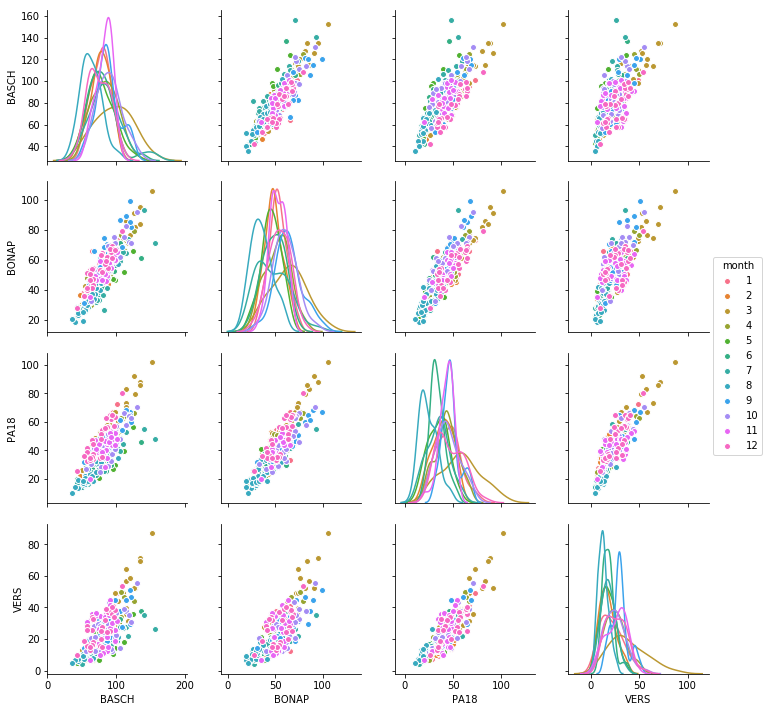

In [26]:
sns.pairplot(aqdata["2014"].dropna(), 
             vars=['BASCH', 'BONAP', 'PA18', 'VERS'],
             diag_kind='kde', hue="month")

## Seaborn works well with Pandas & is built on top of Matplotlib

We will use the Titanic example again:

In [27]:
titanic = pd.read_csv('data/titanic.csv')

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Histogram**: Getting the univariaite distribution of the `Age`

/home/morisset/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

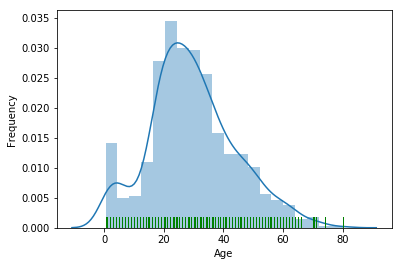

In [29]:
fig, ax = plt.subplots()
sns.distplot(titanic["Age"].dropna(), ax=ax)  # Seaborn does not like Nan values...
sns.rugplot(titanic["Age"].dropna(), color="g", ax=ax) # rugplot provides lines at the individual data point locations
ax.set_ylabel("Frequency")

<div class="alert alert-info">

 <b>Remember</b>: 

Similar to Pandas handling above, we can set up a `figure` and `axes` and add the seaborn output to it; adapt it afterwards

</div>

Compare two variables (**scatter-plot**):

/home/morisset/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/morisset/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


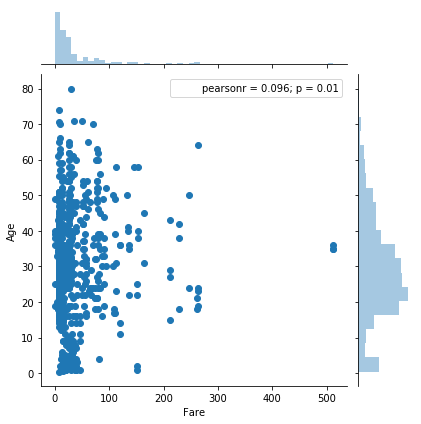

In [30]:
g = sns.jointplot(x="Fare", y="Age", 
                  data=titanic, 
                  kind="scatter") #kde, hex

/home/morisset/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/morisset/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,50,'Frequency')

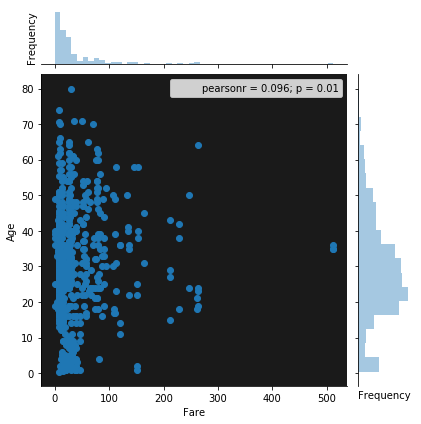

In [31]:
g = sns.jointplot(x="Fare", y="Age", 
                  data=titanic, 
                  kind="scatter") #kde, hex
# Adapt the properties with matplotlib by changing the available axes objects
g.ax_marg_x.set_ylabel("Frequency")
g.ax_joint.set_facecolor('0.1')
g.ax_marg_y.set_xlabel("Frequency")

<div class="alert alert-info">

 <b>Remember</b>: 

Adapting the output of a Seaborn `grid` of different axes can be done as well to adapt it with matplotlib

</div>

Who likes **regressions**?

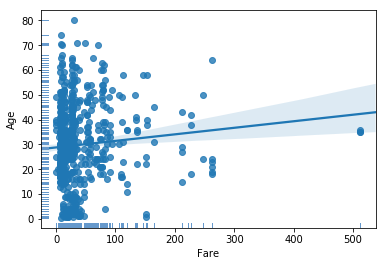

In [32]:
fig, ax = plt.subplots()
sns.regplot(x="Fare", y="Age", data=titanic, ax=ax, lowess=False)
# adding the small lines to indicate individual data points
sns.rugplot(titanic["Fare"].dropna(), axis='x', 
            color="#6699cc", height=0.02, ax=ax)
sns.rugplot(titanic["Age"].dropna(), axis='y', 
            color="#6699cc", height=0.02, ax=ax)

## Section especially for R `ggplot` lovers

### Regressions with factors/categories: `lmplot`

When you want to take into account a category as well to do regressions, use `lmplot` (which is a special case of `Facetgrid`):

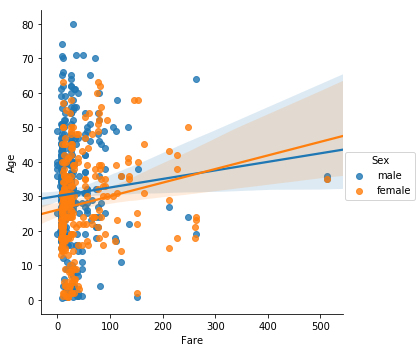

In [33]:
sns.lmplot(x="Fare", y="Age", hue="Sex", 
           data=titanic)

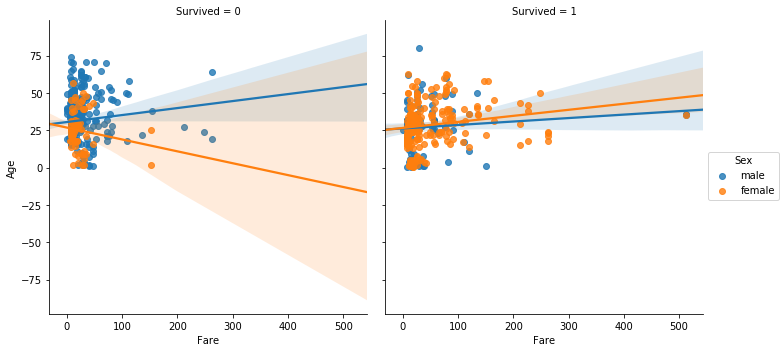

In [34]:
sns.lmplot(x="Fare", y="Age", hue="Sex", 
           col="Survived", data=titanic)

### Other plots with factors/categories: `factorplot`

Another method to create thes **category** based split of columns, colors,... based on specific category columns is the `factorplot`

In [35]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


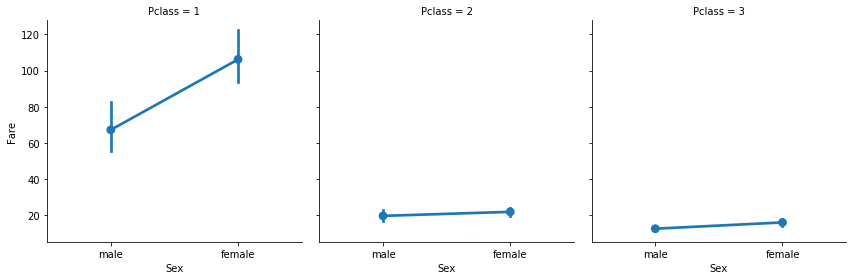

In [36]:
sns.factorplot(x="Sex", 
               y="Fare", 
               col="Pclass", 
               data=titanic) #kind='strip' # violin,...

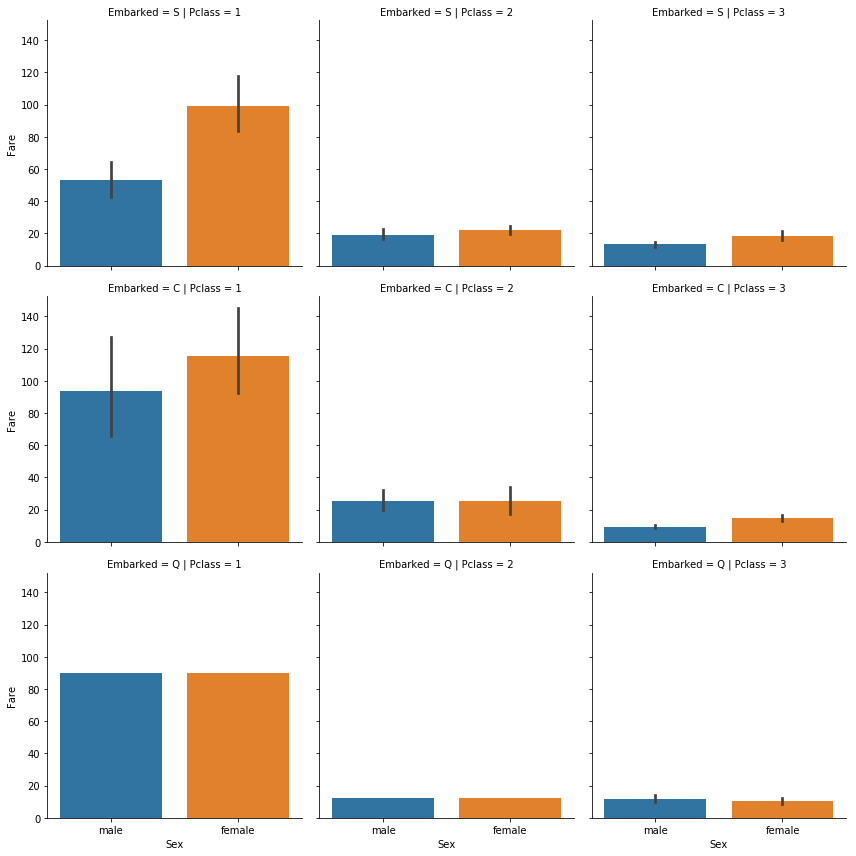

In [37]:
sns.factorplot(x="Sex", y="Fare", col="Pclass", row="Embarked", 
               data=titanic, kind='bar')

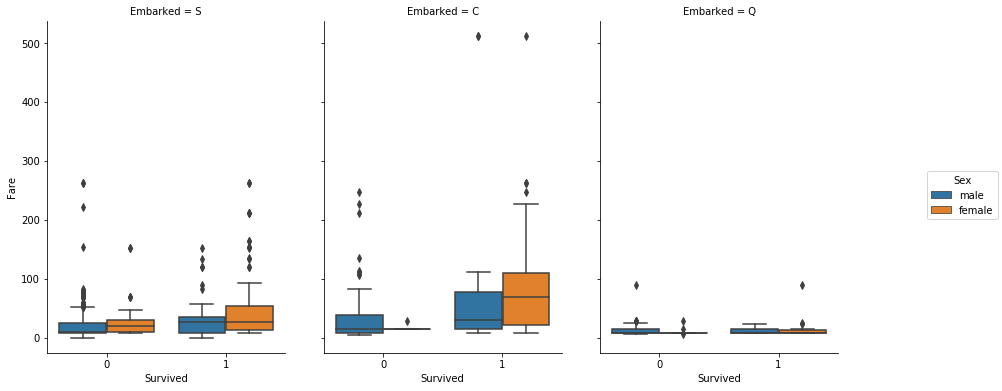

In [38]:
g = sns.factorplot(x="Survived", y="Fare", hue="Sex",
                   col="Embarked", data=titanic, 
                   kind="box", size=4, aspect=.5);
g.fig.set_figwidth(15)
g.fig.set_figheight(6)

<div class="alert alert-info">

 <b>Remember</b>: 
 
 <ul>
  <li>`lmplot` and `factorplot` are shortcuts for a more advanced `FacetGrid` functionality</li>
  <li>If you want to dig deeper into this `FacetGrid`-based plotting, check the [online manual](http://seaborn.pydata.org/tutorial/axis_grids.html)!</li>
</ul>
 
</div>

# Need more matplotlib/seaborn inspiration? 

For more in-depth material:
* http://www.labri.fr/perso/nrougier/teaching/matplotlib/
* notebooks in matplotlib section: http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb#4.-Visualization-with-Matplotlib
* main reference: [matplotlib homepage](http://matplotlib.org/)
* very nice blogpost about customizing figures with matplotlib: http://pbpython.com/effective-matplotlib.html

<div class="alert alert-info" style="font-size:18px">

 <b>Remember</b>(!)

<ul>
  <li>[matplotlib Gallery](http://matplotlib.org/gallery.html)</li>
  <li>[seaborn gallery ](http://seaborn.pydata.org/examples/index.html)</li>
</ul>
<br>
Important resources to start from!

</div>

# Alternatives for matplotlib

We only use matplotlib (or matplotlib-based plotting) in this workshop, and it is still the main plotting library for many scientists, but it is not the only existing plotting library. 

A nice overview of the landscape of visualisation tools in python was recently given by Jake VanderPlas: (or matplotlib-based plotting): https://speakerdeck.com/jakevdp/pythons-visualization-landscape-pycon-2017
 

Bokeh (http://bokeh.pydata.org/en/latest/): interactive, web-based visualisation

In [39]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [40]:
from bokeh.plotting import figure, show
from bokeh.sampledata.iris import flowers


colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = [colormap[x] for x in flowers['species']]

p = figure(title = "Iris Morphology")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.circle(flowers["petal_length"], flowers["petal_width"],
         color=colors, fill_alpha=0.2, size=10)
show(p)

Altair (https://altair-viz.github.io/index.html): declarative statistical visualization library for Python, based on Vega.

In [41]:
from altair import Chart, load_dataset

# load built-in dataset as a pandas DataFrame
iris = load_dataset('iris')

Chart(iris).mark_circle().encode(
    x='petalLength',
    y='petalWidth',
    color='species',
)

ModuleNotFoundError: No module named 'altair'

---
# Acknowledgement


> This notebook is partly based on material of © 2016, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>, licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/) and partly on material of the Met Office (Copyright (C) 2013 SciTools, GPL licensed): https://github.com/SciTools/courses
